In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from io import StringIO
plt.style.use('seaborn')

In [139]:
# recipes_df = pd.read_csv('./data/recipes_clean_10k_df.csv')

In [165]:
recipes_df = pd.read_pickle('./data/recipes_clean_10k')

In [166]:
pd.set_option('display.max_columns', None)

In [167]:
recipes_df = recipes_df.drop(columns = 'level_0')

In [168]:
recipes_df.head(2)

,index,Name,CookTime,PrepTime,TotalTime,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,calories_per_serving
0,2,Best Lemonade,5.0,30.0,35.0,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","(sugar, lemons, rind of, lemon, zest of, fresh...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ...",77.775
1,4,Cabbage Soup,30.0,20.0,50.0,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","(plain tomato juice, cabbage, onion, carrots, ...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil...",25.900


<AxesSubplot:>

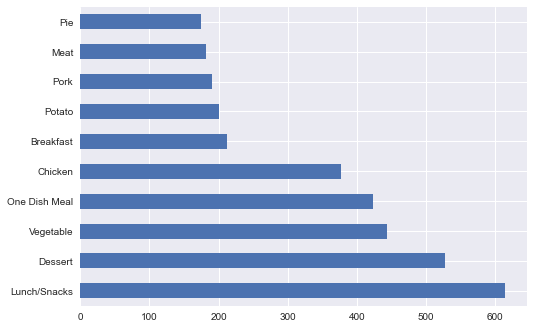

In [169]:
recipes_df['RecipeCategory'].value_counts().head(10).plot(kind='barh')

In [170]:
recipes_df['RecipeIngredientParts'].value_counts()

butter                                                                                               3
(egg, butter)                                                                                        3
cheese                                                                                               3
(sugar, salt, milk, vanilla extract)                                                                 2
(chicken parts, butter, oregano, lemon juice, onion, tomatoes, long-grain white rice)                2
                                                                                                    ..
(frozen corn kernels, butter, cream cheese, garlic clove, white sugar, salt, dried parsley)          1
(dark chocolate, Grand Marnier, marshmallows)                                                        1
(onion, salt, ground black pepper, apples, brown sugar, ground mustard, ground cloves, hot water)    1
(eggs, onion, tomato sauce, salt, pepper, ground cumin, ground coriander)

In [171]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [173]:
popular_ingredients = to_1D(recipes_df['RecipeIngredientParts']).value_counts()

<AxesSubplot:>

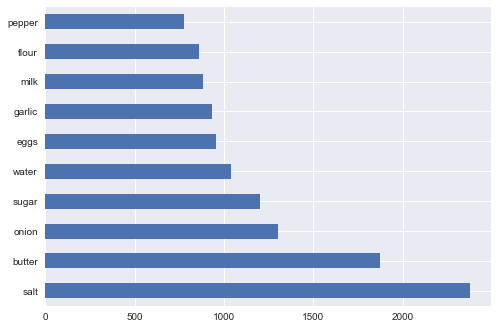

In [179]:
to_1D(recipes_df['RecipeIngredientParts']).value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

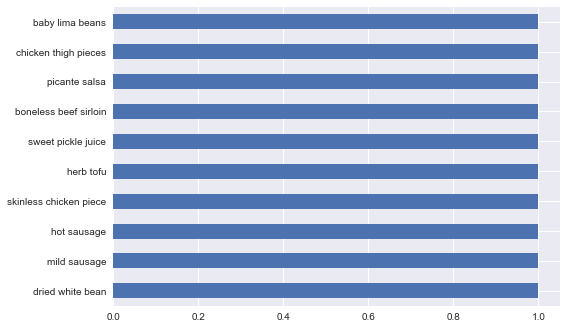

In [180]:
to_1D(recipes_df['RecipeIngredientParts']).value_counts().tail(10).plot(kind='barh')